In [ ]:
# this notebook is to test run the custom stock trading environment

In [1]:
# this library is to get the list of tickers from NASDAQ and S&P500
from gettickers import get_nasdaq_tickers, get_sp500_tickers, create_json_files

nasdaq_tic = get_nasdaq_tickers()
sp500_tic = get_sp500_tickers()

In [3]:
print(nasdaq_tic[0:5])

['CPRT', 'AAPL', 'AMGN', 'CMCSA', 'INTC']


In [1]:
import os
import re

# import libraries for training stable baselines agent
from train_stable_agent import create_stable_agents, evaluate_stable_agent, train_stable_agent, output_stable_agent, full_run

from stable_baselines3.common.env_checker import check_env

# import custom functions and classes
from curatedataset import makegymenv, run_env, full_curate_run

from get_agent import Agent, TradingAlgorithm, overbought_confidence


In [ ]:
full_run("train_config_TSLA.json")

In [2]:
full_curate_run('data_config_TSLA.json', 'trained_stable_agents')

Creating environment
[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/ta/utils.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = series_output.fillna(method="ffill").fillna(value)
/usr/local/lib/python3.10/dist-packages/ta/utils.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = series_output.fillna(method="ffill").fillna(value)
/usr/local/lib/python3.10/dist-packages/ta/utils.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = series_output.fillna(method="ffill").fillna(value)
/usr/local/lib/python3.10/dist-packages/ta/utils.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = series_output.fillna(method="ffill").fillna(val

init env with max step:  550
Getting stable agents
Running agent:  a2c
Episode:  0 Timestep: 417  done
Episode:  1 Timestep: 286  done
Episode:  2 Timestep: 104  done
Episode:  3 Timestep: 549  done
Episode:  4 Timestep: 535  done
Episode:  5 Timestep: 399  done
Episode:  6 Timestep: 185  done
Episode:  7 Timestep: 456  done
Episode:  8 Timestep: 288  done
Episode:  9 Timestep: 549  done
Episode:  10 Timestep: 274  done
Episode:  11 Timestep: 549  done
Episode:  12 Timestep: 109  done
Episode:  13 Timestep: 236  done
Episode:  14 Timestep: 162  done
Episode:  15 Timestep: 455  done
Episode:  16 Timestep: 549  done
Episode:  17 Timestep: 332  done
Episode:  18 Timestep: 549  done
Episode:  19 Timestep: 389  done
Episode:  20 Timestep: 193  done
Episode:  21 Timestep: 439  done
Episode:  22 Timestep: 200  done
Episode:  23 Timestep: 549  done
Episode:  24 Timestep: 278  done
Episode:  25 Timestep: 549  done
Episode:  26 Timestep: 247  done
Episode:  27 Timestep: 168  done
Episode:  28 Ti

Processing data as polars dataframe.
Dataset length:  200
stock_trade_data/trend_sma_fast_TSLA_2019-12-01.json has 200 trajectories
Processing data as polars dataframe.
Dataset length:  200
stock_trade_data/random_TSLA_2019-12-01.json has 200 trajectories
Processing data as polars dataframe.
Dataset length:  200
stock_trade_data/ddpg_TSLA_2019-12-01.json has 200 trajectories
Processing data as polars dataframe.
Dataset length:  200
stock_trade_data/ppo_TSLA_2019-12-01.json has 200 trajectories
Processing data as polars dataframe.
Dataset length:  200
stock_trade_data/momentum_stoch_rsi_TSLA_2019-12-01.json has 200 trajectories
Processing data as polars dataframe.
Dataset length:  200
stock_trade_data/a2c_TSLA_2019-12-01.json has 200 trajectories
Combined dataset has 1200 trajectories
Number of parameters: 4353234


100%|██████████| 38/38 [00:02<00:00, 14.79it/s]


Epoch 0: Loss: 0.7591575384140015


100%|██████████| 38/38 [00:02<00:00, 14.77it/s]


Epoch 100: Loss: 0.1495518833398819


100%|██████████| 38/38 [00:02<00:00, 14.45it/s]


Epoch 119: Loss: 0.16792190074920654
Training time: 0:05:09.383248


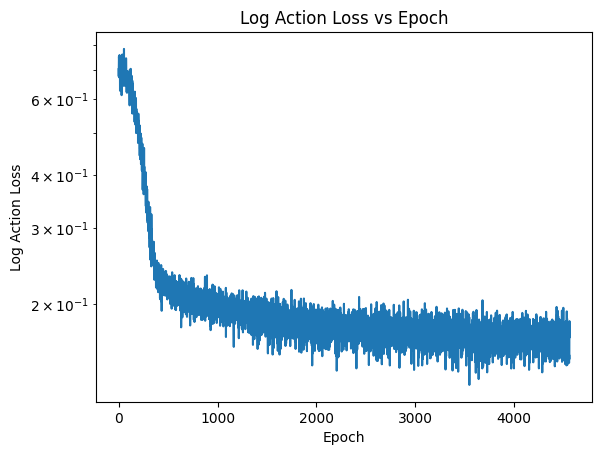

In [4]:
from train_decision_transformer import full_training_run, save_model

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
trained_model, trained_params = full_training_run('stock_trade_data', device = device, n_epochs = 120)

In [5]:
save_model(trained_model, trained_params, 'TSLA', 'trained_TSLA_decision_transformer')

In [22]:
dataset = pl.from_arrow(load_dataset("json", data_files = full_path, field = 'data')['train'].data.table)

stock_trade_data/a2c_TSLA_2019-12-01.json
stock_trade_data/ddpg_TSLA_2019-12-01.json
stock_trade_data/momentum_stoch_rsi_TSLA_2019-12-01.json
stock_trade_data/ppo_TSLA_2019-12-01.json
stock_trade_data/random_TSLA_2019-12-01.json
stock_trade_data/trend_sma_fast_TSLA_2019-12-01.json


In [2]:
import os
import polars as pl
from datasets.load import load_dataset

directory_path = 'stock_trade_data'
reward_dataframes = []

for file_name in os.listdir(directory_path):
    if file_name.endswith('.json'):
        # Load the dataset
        full_path = os.path.join(directory_path, file_name)
        dataset = pl.from_arrow(load_dataset("json", data_files = full_path, field = 'data')['train'].data.table)
        
        # Calculate the reward statistics
        reward_dataframe = pl.DataFrame({
            'reward_min': dataset['reward'].map_elements(lambda s: s.min()),
            'reward_max': dataset['reward'].map_elements(lambda s: s.max()),
            'reward_10': dataset['reward'].map_elements(lambda s: s.quantile(0.1)),
            'reward_25': dataset['reward'].map_elements(lambda s: s.quantile(0.25)),
            'reward_50': dataset['reward'].map_elements(lambda s: s.quantile(0.5)),
            'reward_75': dataset['reward'].map_elements(lambda s: s.quantile(0.75)),
            'reward_90': dataset['reward'].map_elements(lambda s: s.quantile(0.9))
        })
        
        # Append the reward dataframe to the list
        reward_dataframes.append(reward_dataframe)

combined_dataframe = pl.concat(reward_dataframes)

In [3]:
# calculate the mean of the reward statistics
mean_reward_dataframe = pl.DataFrame({
    'reward_min': combined_dataframe['reward_min'].mean(),
    'reward_max': combined_dataframe['reward_max'].mean(),
    'reward_10': combined_dataframe['reward_10'].mean(),
    'reward_25': combined_dataframe['reward_25'].mean(),
    'reward_50': combined_dataframe['reward_50'].mean(),
    'reward_75': combined_dataframe['reward_75'].mean(),
    'reward_90': combined_dataframe['reward_90'].mean()
})
print(mean_reward_dataframe)

shape: (1, 7)
┌───────────────┬──────────────┬──────────────┬────────────┬────────────┬────────────┬─────────────┐
│ reward_min    ┆ reward_max   ┆ reward_10    ┆ reward_25  ┆ reward_50  ┆ reward_75  ┆ reward_90   │
│ ---           ┆ ---          ┆ ---          ┆ ---        ┆ ---        ┆ ---        ┆ ---         │
│ f64           ┆ f64          ┆ f64          ┆ f64        ┆ f64        ┆ f64        ┆ f64         │
╞═══════════════╪══════════════╪══════════════╪════════════╪════════════╪════════════╪═════════════╡
│ -33878.229895 ┆ 34908.051943 ┆ -3047.413692 ┆ -539.62015 ┆ -50.600191 ┆ 460.528614 ┆ 2744.606155 │
└───────────────┴──────────────┴──────────────┴────────────┴────────────┴────────────┴─────────────┘


In [1]:
from curatedataset import makegymenv, run_env
# make gym environment
stock_name = 'TSLA'
start_date = '2022-06-01'
num_days = 365
interval = '1d'
indicators = ["Volume", "volume_cmf", "trend_macd", "momentum_rsi", "momentum_stoch_rsi", "trend_sma_fast"]
init_balance = 20000
#data = get_stock_data_yf_between_with_indicators(stock_name, '2019-01-01', '2020-02-01', interval, ['all'])
#norm_env, obs_space, act_space, col, data = makegymenv(stock_name, start_date, num_days, interval, normalize=True, init_balance=init_balance)
env,obs_space, act_space, col, data = makegymenv(stock_name, start_date, num_days, interval, indicators=indicators, normalize=False, init_balance=init_balance)


[*********************100%%**********************]  1 of 1 completed
init env with max step:  250


/usr/local/lib/python3.10/dist-packages/ta/trend.py:988: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '258.3132098388672' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  self._psar.iloc[i] = self._psar.iloc[i - 1] + (
/usr/local/lib/python3.10/dist-packages/ta/trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2
/code/src/curatedataset.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['momentum_stoch_rsi'].iloc[:10] = 0.5


In [2]:
from get_agent import Agent
import torch
parameter_path = 'trained_TSLA_decision_transformer/TSLA_params.json'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DecisionTransformer = Agent(env, 'transformer', rtg_target=460, rtg_scale=0.7, model_path=parameter_path, device=device)

In [3]:
trade_data = run_env(DecisionTransformer, stock_name, env, 10, start_date)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument index in method wrapper_CUDA__index_select)

In [5]:
col

['Open',
 'High',
 'Low',
 'Close',
 'volume_cmf',
 'trend_macd',
 'momentum_rsi',
 'momentum_stoch_rsi',
 'Balance',
 'Net_worth',
 'Shares_held',
 'Cost_basis',
 'Total_shares_sold',
 'Total_sales_value']